# Importing tensorflow


In [1]:
import tensorflow as tf
from tensorflow import constant, Variable

import numpy as np
import skimage as skimage
import os, sys


# Linear Algebra Operations in Tensorflow

Throughout this course, we will use tensorflow version 2.6.0 and will exclusively import the submodules needed to complete each exercise. 
This will usually be done for you, but you will do it in this exercise by importing constant from tensorflow.
After you have imported constant, you will use it to transform a numpy array, credit_numpy, into a tensorflow constant, credit_constant. 
This array contains feature columns from a dataset on credit card holders and is previewed in the image below. We will return to this dataset in later chapters.

Note that tensorflow 2 allows you to use data as either a numpy array or a tensorflow constant object. 

Using a constant will ensure that any operations performed with that object are done in tensorflow.


In [2]:
credit_numpy = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
    ])
credit_constant = constant(credit_numpy)

2021-11-06 23:32:25.908404: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Defining variables
Unlike a constant, a variable's value can be modified. This will be useful when we want to train a model by updating its parameters.

Let's try defining and printing a variable. We'll then convert the variable to a numpy array, print again, and check for differences. Note that Variable(), which is used to create a variable tensor, has been imported from tensorflow and is available to use in the exercise.

In [3]:
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print('\n A1: ', A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print('\n B1: ', B1)


 A1:  <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

 B1:  [1 2 3 4]


# Basic Operations


In [4]:
from tensorflow import ones, constant, add, matmul, multiply, Variable, reduce_sum, ones_like

Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the  symbol, is shown below:

  
$$\begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} \cdot \begin{bmatrix} 3 & 1 \\ 2 & 5 \end{bmatrix} = \begin{bmatrix} 3 & 2 \\ 4 & 5 \end{bmatrix}$$  
 

In this exercise, you will perform element-wise multiplication, paying careful attention to the shape of the tensors you multiply. Note that multiply(), constant(), and ones_like() have been imported for you.


In [5]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))


 C1: [1 2 3 4]

 C23: [[1 2 3]
 [1 6 4]]


# Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.
 
$$features = \begin{bmatrix} 2 & 24 \\ 2 & 26 \\ 2 & 57 \\ 1 & 37 \end{bmatrix}, bill = \begin{bmatrix} 3913 \\ 2682 \\ 8617 \\ 64400 \end{bmatrix}, params = \begin{bmatrix} 1000 \\ 150\end{bmatrix}$$

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill. Note that we have imported matmul() and constant().

In [6]:
# Import operators from tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow import constant, Variable, ones, matmul, multiply, reduce_sum

import numpy as np

# Define features, params, and bill as constants
features = constant([
    [2, 24], 
    [2, 26], 
    [2, 57], 
    [1, 37],
    ])

params = constant([
    [1000], 
    [150],
    ])

bill = constant([
    [3913], 
    [2682], 
    [8617], 
    [64400],
    ])

# Compute billpred using features and params
billpred = matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

2.6.0
[[-1687]
 [-3218]
 [-1933]
 [57850]]


# Summing over tensor dimensions
You've been given a matrix, wealth. This contains the value of bond and stock wealth for five individuals in thousands of dollars.

$$wealth = \begin{bmatrix} 11 & 50 \\ 7 & 2 \\ 4 & 60 \\ 3 & 0 \\ 25 & 10 \end{bmatrix}$$

The first column corresponds to bonds and the second corresponds to stocks. Each row gives the bond and stock wealth for a single individual. Use wealth, reduce_sum(), and .numpy() to determine which statements are correct about wealth.

In [7]:
wealth = constant([
    [11,50],
    [7,2],
    [4,60],
    [3,0],
    [25,10],
])

print(
    'First column | Second column\n',
    reduce_sum(wealth, axis=0).numpy()
    ) 

First column | Second column
 [ 50 122]


# Advanced Operations

- We have learned the following basic operations using Tensorflow
  - add(): Elemenwise summation of two tensors
  - multiply(): Element-wise multiplication of two tensors
  - matmul(): Matrix multiplication of two tensors
  - reduce_sum(): Sums over all dimensions of a tensor.

- Now we explore more advance operations such as:
  - gradient(): Computes the gradient of a function with respect to one or more variables
  - reshape(): Reshapes a tensor
  - random(): Generates random values

The aim of this operations is for example to find local minima and maxima of a function.

In [8]:
## Example 
# Import tensorflow
import tensorflow as tf

# Define x
x = tf.Variable(-1.0)

# Define y within instance of GradientTape
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x,x)
    
# Evaluate the gradients of y with respect to x at x = -1
g = tape.gradient(y,x)
print(g.numpy())

-2.0


# Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays gray_tensor and color_tensor. Reshape these arrays into 1-dimensional vectors using the reshape operation, which has been imported for you from tensorflow. Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3.

In [9]:
gray_tensor = np.array([[187, 189, 190, 192, 195, 198, 198, 198, 200, 200, 201, 205, 206,
        203, 206, 206, 206, 207, 209, 207, 205, 205, 208, 208, 206, 207,
        206, 206],
       [189, 191, 193, 195, 197, 199, 200, 199, 200, 201, 202, 206, 206,
        208, 204, 204, 210, 209, 208, 208, 207, 206, 208, 208, 207, 207,
        207, 207],
       [189, 192, 195, 198, 198, 201, 202, 203, 205, 206, 205, 209, 207,
        204, 211, 210, 205, 208, 211, 208, 206, 207, 209, 210, 210, 208,
        210, 210],
       [191, 192, 195, 197, 199, 199, 204, 201, 203, 208, 206, 207, 209,
        207, 213, 208, 209, 211, 221, 205, 204, 239, 182, 212, 213, 212,
        209, 209],
       [193, 195, 195, 199, 201, 201, 203, 205, 206, 216, 223, 203, 207,
        239, 225, 193, 188, 230, 232, 195, 176, 239, 191, 205, 215, 212,
        211, 213],
       [194, 196, 199, 200, 206, 202, 205, 207, 196, 255, 238, 197, 160,
        235, 226, 191, 146, 190, 226, 201, 160, 228, 211, 162, 215, 214,
        216, 213],
       [195, 198, 201, 202, 202, 203, 232, 215, 197, 246, 230, 215, 153,
        235, 221, 205, 162, 181, 224, 210, 166, 202, 209, 163, 190, 213,
        211, 213],
       [196, 198, 201, 208, 202, 243, 240, 215, 166, 246, 233, 223, 171,
        235, 212, 214, 165, 206, 224, 199, 152, 126, 206, 199, 170, 165,
        214, 215],
       [198, 201, 197, 204, 189, 247, 244, 230, 206, 246, 235, 220, 188,
        235, 211, 218, 142, 227, 223, 176, 152,  74, 192, 206, 200, 145,
        177, 215],
       [200, 203, 206, 206, 236, 254, 254, 233, 215, 205, 242, 219, 185,
        234, 230, 223, 131, 201, 209, 156, 141,  83, 175, 220, 196, 157,
        185, 222],
       [201, 200, 201, 193, 253, 231, 245, 246, 209, 159, 241, 214, 176,
        219, 234, 212, 133, 132, 175, 149, 109, 100, 225, 226, 209, 147,
        219, 221],
       [202, 203, 203, 196, 253, 209, 241, 233, 194, 150, 234, 204, 174,
        160, 208, 189, 146, 101, 172, 145,  76, 195, 230, 226, 194, 121,
        227, 224],
       [204, 203, 210, 245, 251, 222, 207, 198, 152, 112, 207, 171, 163,
         97, 163, 154, 122, 105, 175, 169, 175, 227, 226, 206, 154, 147,
        219, 225],
       [204, 205, 201, 250, 246, 217, 167, 204, 146, 116, 192, 170, 161,
         78, 151, 165, 115, 181, 228, 225, 223, 215, 203, 181, 144, 202,
        220, 227],
       [205, 207, 198, 252, 254, 228, 198, 185, 162, 128, 202, 194, 144,
         64, 135, 155, 237, 241, 237, 226, 211, 177, 179, 155, 142, 227,
        227, 228],
       [210, 211, 208, 255, 252, 240, 219, 187, 168, 148, 187, 202, 151,
        103, 192, 246, 253, 244, 233, 221, 199, 179, 157, 154, 116, 234,
        228, 231],
       [208, 211, 209, 254, 254, 248, 231, 216, 193, 175, 178, 201, 208,
        240, 253, 254, 249, 238, 222, 206, 185, 160, 143, 143, 214, 231,
        230, 230],
       [209, 212, 205, 254, 254, 252, 241, 229, 217, 187, 207, 224, 249,
        253, 251, 250, 242, 228, 206, 183, 166, 150, 143, 172, 229, 234,
        235, 230],
       [208, 211, 206, 254, 254, 255, 249, 238, 231, 211, 213, 230, 250,
        254, 252, 246, 233, 217, 188, 164, 150, 143, 120, 235, 231, 230,
        231, 231],
       [209, 213, 211, 253, 255, 255, 252, 244, 233, 222, 217, 224, 246,
        251, 242, 234, 225, 195, 173, 153, 134, 116, 225, 232, 235, 232,
        233, 233],
       [209, 214, 214, 246, 254, 253, 252, 240, 224, 214, 213, 217, 233,
        233, 230, 214, 199, 190, 150, 145, 127, 201, 233, 234, 232, 234,
        233, 234],
       [211, 215, 215, 243, 254, 254, 245, 232, 221, 208, 213, 218, 225,
        223, 206, 195, 169, 157, 132, 126, 170, 238, 234, 235, 234, 234,
        234, 234],
       [214, 216, 217, 209, 254, 250, 236, 229, 212, 197, 206, 210, 221,
        210, 196, 170, 148, 140, 118, 134, 240, 235, 234, 235, 235, 236,
        235, 236],
       [186, 175, 180, 150, 156, 158, 144, 124, 132, 134, 148, 153, 150,
        146, 137, 134, 126, 109, 114, 235, 237, 234, 238, 236, 236, 236,
        236, 237],
       [145, 135, 137, 134, 122, 136, 112,  95,  94,  90,  93,  65,  60,
         66,  61,  66,  58,  66,  80, 164, 247, 235, 236, 237, 239, 237,
        237, 235],
       [140, 146, 136, 132, 129, 134, 100, 103, 100, 100,  87,  64,  66,
         65,  57,  57,  61,  61,  64,  65, 177, 242, 238, 238, 239, 238,
        238, 238],
       [141, 146, 140, 131, 130, 136,  93,  97, 102,  96,  78,  71,  68,
         64,  60,  61,  60,  55,  58,  48, 254, 238, 240, 239, 238, 237,
        237, 238],
       [146, 143, 137, 138, 129, 113,  94,  98, 101,  87,  75,  70,  68,
         63,  60,  58,  56,  57,  63,  81, 237, 237, 240, 240, 239, 240,
        240, 240]])

In [10]:
import tensorflow as tf

In [11]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (28*28*1, 1)) # Shape of image vector is 28x28x1 (for grayscale)

# Optimizing with gradient
You are given a loss function, , which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

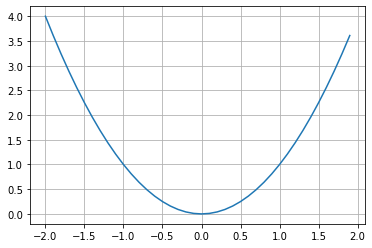

In [12]:
from matplotlib import pyplot as plt
x = np.arange(-2,2,0.1)
plt.plot(x,x**2)
plt.grid()

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. The following operations are available: GradientTape(), multiply(), and Variable().

In [13]:
import tensorflow as tf

def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = multiply(x,x)
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


# Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, _letter_. You want to determine whether the _letter_ is an X or a K. You don't have a trained neural network, but you do have a simple model, _model_, which can be used to classify _letter_.

The 3x3 tensor, _letter_, and the 1x3 tensor, _model_, are available in the Python shell. You can determine whether _letter_ is a K by multiplying _letter_ by _model_, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, _model_ is a collection of weights, arranged in a tensor.

Note that the functions reshape(), matmul(), and reduce_sum() have been imported from tensorflow and are available for use.

In [14]:
import tensorflow as tf
from tensorflow import reshape, matmul, reduce_sum

letter = np.array([[1,0,1],[1,1,0],[1,0,1]])
print('\nLetter:\n',letter)
model = np.array([[1,0,-1]])
print('\nModel:\n',model)

# Reshape model from a 1x3 to a 3x1 tensor
model = reshape(model, (3*1, 1))
print('\nModel after reshape:\n',model)

# Multiply letter by model
output = matmul(letter, model)
print('\nOutput of matmul(letter,model):\n',output)

# Sum over output and print prediction using the numpy method
prediction = reduce_sum(output,axis=0)
print('\n',prediction.numpy())



Letter:
 [[1 0 1]
 [1 1 0]
 [1 0 1]]

Model:
 [[ 1  0 -1]]

Model after reshape:
 tf.Tensor(
[[ 1]
 [ 0]
 [-1]], shape=(3, 1), dtype=int64)

Output of matmul(letter,model):
 tf.Tensor(
[[0]
 [1]
 [0]], shape=(3, 1), dtype=int64)

 [1]


# Input Data
## Data can be imported using tensorflow
- Usefull for managing complex pipelines
- Not necessary for this chapter  
## Simpler option used in this chapter
- Import data using pandas
- Convert data to numpy array
- Use in _tensorflow_ without modification

In [15]:
# Imports
import numpy as np
import pandas as pd

In [16]:
## First Approach using Pandas and Numpy! 
# Load data from csv
housing = pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:

# convert to numpy array
#housing = np.array(housing)

# Convert price column to float32
price = np.array(housing['price'], dtype=np.float32)

# Convert waterfront column to boolean
waterfront = np.array(housing['waterfront'], dtype=np.bool)


In [18]:
## Second approach using Tensorflow!
# Load data from csv
housing = pd.read_csv('kc_house_data.csv')

# Convert price column to float32
price = tf.cast(housing['price'], tf.float32)

# Convert waterfront column to boolean
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Loss Functions
## Fundamental tensorflow operation
- Loss functions are tensors that represent the difference between the model's predictions and the true values.
- Used to train a model
- Measure of model fit  
__Higher value -> worse fit (loss values can be considered as grade of unhappiness)__
- Minimize the loss function

## Tensorflow has operations for common loss functions
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE) 
- Huber Loss

![Loss Functions](../../data/img/loss_function_types.png)

In blue color, the MSE loss function, in orange color, the MAE loss function and in green color, the Huber loss function.  

In can be seen, that MSE strongly penalizes outliers due to high values on the y-axis.

The MAE and Huber loss functions are similar, but the Huber loss function is more robust to outliers - because it is a quadratic function and thus does not penalize outliers as much as the MSE loss function.

In [19]:
# import TensorFlow
import tensorflow as tf
from tensorflow import keras

# Defining a loss function
def linear_regression(intercept, slope,features):
    return intercept + slope * features

def loss_function(intercept, slope,targets, features):
    # Compute the predictions for a linear model
    predictions = linear_regression(intercept, slope)
    
    # Return the loss
    return tf.keras.losses.mse(targets, predictions)


# Linear Regression with TensorFlow
In this exercise, you will use TensorFlow to fit a linear regression model to the data in the file 'data/boston_house_prices.csv'. A linear regression model is a model that maps an input feature vector to a scalar output value as follows:
$$y = m_1 \cdot x_1 + ... + m_n \cdot x_n + c $$

In [20]:
### Example  
# Convert price column to float32
price = tf.cast(housing['price'], tf.float32)

# Convert size column to float32
size = tf.cast(housing['sqft_living'], tf.float32)

# Define the intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

# Define the linear regression model
def linear_regression(intercept, slope,features = size):
    return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets = price, features = size):
    # Compute the predictions for a linear model
    predictions = linear_regression(intercept, slope)
    return tf.keras.losses.mse(targets, predictions)

# Define the optimizer
opt = tf.keras.optimizers.Adam() # the learning rate is 0.1

# Minimize the loss function and print loss
for j in range(1000):
    opt.minimize(
        lambda: loss_function(intercept, slope), 
        var_list=[intercept, slope])
    #print(loss_function(intercept, slope))

print(intercept.numpy(), slope.numpy())

1.099176 1.0991883


## Train a linear model
In this exercise, we will pick up where the previous exercise ended. The intercept and slope, __intercept__ and __slope__, have been defined and initialized. Additionally, a function has been defined, __loss_function(__intercept__, __slope__)__, which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of __intercept__ and __slope__. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.

In [21]:
# Initialize variables
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

# Initialize an Adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
#plot_results(intercept, slope)

424840500000.0
411406070000.0
398277700000.0
385485440000.0
373046500000.0
360967600000.0
349248780000.0
337886400000.0
326875200000.0
316208840000.0


## Multiple linear regression
In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use __price_log__ as your target and __size_log__ and __bedrooms__ as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: __keras.losses.mae()__.

Finally, the predicted values are computed as follows: 

__params[0] + feature1 * params[1] + feature2*params[2]__.

Note that we've defined a vector of parameters, params, as a variable, rather than using three variables. Here, params[0] is the intercept and params[1] and params[2] are the slopes.

# Batch Training


In [25]:
# Import tensorflow, pandas, and numpy
import tensorflow as tf
import pandas as pd
import numpy as np

# Define trainable variables
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
    return intercept + features*slope

# Compute predicted values and return loss function
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

# Define optimization operation
opt = tf.keras.optimizers.Adam()

# Load the data in batches from pandas
for batch in pd.read_csv('./kc_house_data.csv', chunksize=100):
    # Extract the target and feature columns    
    price_batch = np.array(batch['price'], np.float32)    
    size_batch = np.array(batch['sqft_lot'], np.float32)
    
    # Minimize the loss function    
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch),
                 var_list=[intercept, slope])
    
    # Print parameter values
    print(intercept.numpy(), slope.numpy())

0.101 0.101
0.10199899 0.10199937
0.102998435 0.10299699
0.10400031 0.10398846
0.10500375 0.104987085
0.10600952 0.10599103
0.1070124 0.10697429
0.10801417 0.10793939
0.10901249 0.108877264
0.11000538 0.10979223
0.11099832 0.110718474
0.11199712 0.11165525
0.11299419 0.112579174
0.113997646 0.11351572
0.1150085 0.11445159
0.11601862 0.11537831
0.11702207 0.11631398
0.11802591 0.11729606
0.119032614 0.11827049
0.12003659 0.11923201
0.121043846 0.12017934
0.12205039 0.12112183
0.12305397 0.12205291
0.12405374 0.12298835
0.12506042 0.12392123
0.12606408 0.124855824
0.12706958 0.12578833
0.12807287 0.1267062
0.12908298 0.12765504
0.13009037 0.12864174
0.13109654 0.12961163
0.13210507 0.13059197
0.1331175 0.13155898
0.13412856 0.13252482
0.13513504 0.13352256
0.13613608 0.13451622
0.13713042 0.13548161
0.13813241 0.1364749
0.13913755 0.13747682
0.14015149 0.13853979
0.1411694 0.13960584
0.14218828 0.14065053
0.14320695 0.14168672
0.14422125 0.14274193
0.14524846 0.14385107
0.14626478 0.1449

## Comparison Batch and Full-Sample training
| Full Sample                           | Batch Training              |
| --------------------------------------| --------------------------- |
| One update per epoch                  | Multiple updates per epoch  |
| Accepts dataset without modification  | Requires divison of dataset |
| Limited by memory                     | No limit on dataset size    |   

## Preparing to batch train
Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that will predict price_batch, a batch of house prices, using size_batch, a batch of lot sizes in square feet. In contrast to the previous lesson, we will do this by loading batches of data using pandas, converting it to numpy arrays, and then using it to minimize the loss function in steps.

Variable(), keras(), and float32 have been imported for you. Note that you should not set default argument values for either the model or loss function, since we will generate the data in batches during the training process.

In [26]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope * features

# Define the loss function
def loss_function(intercept,slope,targets,features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

## Training a linear model in batches
In this exercise, we will train a linear regression model in batches, starting where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, __intercept__ and __slope__, after each step. This approach will allow us to train with datasets that are otherwise too large to hold in memory.

Note that the loss function, __loss_function(intercept, slope, targets, features)__, has been defined for you. Additionally, __keras__ has been imported for you and __numpy__ is available as np. The trainable variables should be entered into var_list in the order in which they appear as loss function arguments.

In [27]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [28]:
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())


10.217888 0.7016


# Dense Layers
In this chapter, we will focus on training neural networks in TensorFlow. We will start with an overview of a frequently used component of neural networks: the dense layer.


In [29]:
### Low level API - Linear Algebra Way
import tensorflow as tf

# Define inputs (features) 
inputs = tf.constant([[1.0, 35.0]])

# Define weights
weights = tf.Variable([[-0.05], [-0.01]])

# Define bias
bias = tf.Variable([0.5])

# Multiply inputs (features) by the weights
product = tf.matmul(inputs, weights)

# Define dense layer
dense = tf.keras.activations.sigmoid(product + bias)

In [30]:
### High level API - High Level API Way

# Define input features layer
inputs = tf.constant([[1.0, 35.0]])

# Define first dense layer
dense1 = tf.keras.layers.Dense(units=10, 
                               activation='sigmoid', 
                               )(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(units=5, 
                               activation='sigmoid', 
                               )(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(units=1, 
                               activation='sigmoid', 
                               )(dense2)

| High Level Approach | Low Level Approach |
| --------------------| ------------------ |
```dense = keras.layers.Dense(units=10,activation='sigmoid') ``` | ```prod= matmul(inputs,weights) & dense = keras.avtivations.sigmoid(prod)```|


## The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. 

The first involves the use of low-level, linear algebraic operations. 

The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.

![NN](../../data/img/3_2_1_network2.png)

This image depicts an neural network with 5 input nodes and 3 output nodes.
The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

In [31]:
import tensorflow as tf
from tensorflow import keras, Variable, constant, matmul # instead of prefixing this stuff by tf.*

# Initialize borrower_features
borrower_features = tf.constant([
        [3.,3.,23.],
        [2.,1.,24.],
        [1.,1.,49.],
        [1.,1.,49.],
        [2.,1.,29.],
    ],dtype=tf.float32)

# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(
    ones((3, 2))
    )

# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (5, 2)


In [32]:
# From previous step
bias1 = Variable(1.0)
weights1 = Variable(ones((3, 2)))
product1 = matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1,weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


## The low-level approach with multiple examples
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

$$ products1 = \begin{bmatrix} 3 & 3 & 23 \\ 2 & 1 & 24 \\ 1 & 1 & 49 \\ 1 & 1 & 49 \\ 2 & 1 & 29 \end{bmatrix} \begin{bmatrix} -0.6 & 0.6 \\ 0.8 & -0.3 \\ -0.09 & -0.08 \end{bmatrix}$$ 

Note that matmul() and keras() have been imported from tensorflow.

In [33]:
# Compute the product of borrower_features and weights1
products1 = matmul(borrower_features,weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1+bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: (r,c)', borrower_features.shape)
print('\n shape of weights1: (r,c)', weights1.shape)
print('\n shape of bias1: (r,c)', bias1.shape)
print('\n shape of dense1: (r,c)', dense1.shape)


 shape of borrower_features: (r,c) (5, 3)

 shape of weights1: (r,c) (3, 2)

 shape of bias1: (r,c) ()

 shape of dense1: (r,c) (5, 2)


## Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

![NN](../../data/img/10_7_3_1_network.png)

To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function. Note that input data has been defined and is available as a 100x10 tensor: borrower_features. Additionally, the keras.layers module is available.

In [34]:
borrower_features = tf.constant(
        [
        [6.96469188e-01, 2.86139339e-01, 2.26851448e-01, 5.51314771e-01,
        7.19468951e-01, 4.23106462e-01, 9.80764210e-01, 6.84829712e-01,
        4.80931908e-01, 3.92117530e-01],
       [3.43178004e-01, 7.29049683e-01, 4.38572258e-01, 5.96778952e-02,
        3.98044258e-01, 7.37995386e-01, 1.82491735e-01, 1.75451756e-01,
        5.31551361e-01, 5.31827569e-01],
       [6.34400964e-01, 8.49431813e-01, 7.24455297e-01, 6.11023486e-01,
        7.22443402e-01, 3.22958916e-01, 3.61788660e-01, 2.28263229e-01,
        2.93714046e-01, 6.30976140e-01],
       [9.21049416e-02, 4.33701187e-01, 4.30862755e-01, 4.93685097e-01,
        4.25830305e-01, 3.12261224e-01, 4.26351309e-01, 8.93389165e-01,
        9.44160044e-01, 5.01836658e-01],
       [6.23952925e-01, 1.15618393e-01, 3.17285478e-01, 4.14826214e-01,
        8.66309166e-01, 2.50455379e-01, 4.83034253e-01, 9.85559762e-01,
        5.19485116e-01, 6.12894535e-01],
       [1.20628662e-01, 8.26340795e-01, 6.03060126e-01, 5.45068026e-01,
        3.42763841e-01, 3.04120779e-01, 4.17022198e-01, 6.81300759e-01,
        8.75456870e-01, 5.10422349e-01],
       [6.69313788e-01, 5.85936546e-01, 6.24903500e-01, 6.74689054e-01,
        8.42342436e-01, 8.31949860e-02, 7.63682842e-01, 2.43666381e-01,
        1.94222957e-01, 5.72456956e-01],
       [9.57125202e-02, 8.85326803e-01, 6.27248943e-01, 7.23416328e-01,
        1.61292069e-02, 5.94431877e-01, 5.56785166e-01, 1.58959642e-01,
        1.53070509e-01, 6.95529521e-01],
       [3.18766415e-01, 6.91970289e-01, 5.54383278e-01, 3.88950586e-01,
        9.25132513e-01, 8.41669977e-01, 3.57397556e-01, 4.35914621e-02,
        3.04768085e-01, 3.98185670e-01],
       [7.04958856e-01, 9.95358467e-01, 3.55914861e-01, 7.62547791e-01,
        5.93176901e-01, 6.91701770e-01, 1.51127458e-01, 3.98876280e-01,
        2.40855902e-01, 3.43456000e-01],
       [5.13128161e-01, 6.66624546e-01, 1.05908483e-01, 1.30894944e-01,
        3.21980596e-01, 6.61564350e-01, 8.46506238e-01, 5.53257346e-01,
        8.54452491e-01, 3.84837806e-01],
       [3.16787899e-01, 3.54264677e-01, 1.71081826e-01, 8.29112649e-01,
        3.38670850e-01, 5.52370071e-01, 5.78551471e-01, 5.21533072e-01,
        2.68806447e-03, 9.88345444e-01],
       [9.05341566e-01, 2.07635865e-01, 2.92489409e-01, 5.20010173e-01,
        9.01911378e-01, 9.83630896e-01, 2.57542074e-01, 5.64359069e-01,
        8.06968689e-01, 3.94370049e-01],
       [7.31073022e-01, 1.61069021e-01, 6.00698590e-01, 8.65864456e-01,
        9.83521581e-01, 7.93657899e-02, 4.28347290e-01, 2.04542860e-01,
        4.50636476e-01, 5.47763586e-01],
       [9.33267102e-02, 2.96860784e-01, 9.27584231e-01, 5.69003761e-01,
        4.57412004e-01, 7.53525972e-01, 7.41862178e-01, 4.85790335e-02,
        7.08697379e-01, 8.39243352e-01],
       [1.65937886e-01, 7.80997932e-01, 2.86536604e-01, 3.06469738e-01,
        6.65261447e-01, 1.11392170e-01, 6.64872468e-01, 8.87856781e-01,
        6.96311295e-01, 4.40327883e-01],
       [4.38214391e-01, 7.65096068e-01, 5.65641999e-01, 8.49041641e-02,
        5.82671106e-01, 8.14843714e-01, 3.37066382e-01, 9.27576602e-01,
        7.50716984e-01, 5.74063838e-01],
       [7.51644015e-01, 7.91489631e-02, 8.59389067e-01, 8.21504116e-01,
        9.09871638e-01, 1.28631204e-01, 8.17800835e-02, 1.38415575e-01,
        3.99378717e-01, 4.24306870e-01],
       [5.62218368e-01, 1.22243546e-01, 2.01399505e-01, 8.11644375e-01,
        4.67987567e-01, 8.07938218e-01, 7.42637832e-03, 5.51592708e-01,
        9.31932151e-01, 5.82175434e-01],
       [2.06095725e-01, 7.17757583e-01, 3.78985852e-01, 6.68383956e-01,
        2.93197222e-02, 6.35900378e-01, 3.21979336e-02, 7.44780660e-01,
        4.72912997e-01, 1.21754356e-01],
       [5.42635918e-01, 6.67744428e-02, 6.53364897e-01, 9.96086299e-01,
        7.69397318e-01, 5.73774099e-01, 1.02635257e-01, 6.99834049e-01,
        6.61167860e-01, 4.90971319e-02],
       [7.92299330e-01, 5.18716574e-01, 4.25867707e-01, 7.88187146e-01,
        4.11569238e-01, 4.81026262e-01, 1.81628838e-01, 3.21318895e-01,
        8.45533013e-01, 1.86903745e-01],
       [4.17291075e-01, 9.89034534e-01, 2.36599818e-01, 9.16832328e-01,
        9.18397486e-01, 9.12963450e-02, 4.63652730e-01, 5.02216339e-01,
        3.13668936e-01, 4.73395362e-02],
       [2.41685644e-01, 9.55296382e-02, 2.38249913e-01, 8.07791114e-01,
        8.94978285e-01, 4.32228930e-02, 3.01946849e-01, 9.80582178e-01,
        5.39504826e-01, 6.26309335e-01],
       [5.54540846e-03, 4.84909445e-01, 9.88328516e-01, 3.75185519e-01,
        9.70381573e-02, 4.61908758e-01, 9.63004470e-01, 3.41830611e-01,
        7.98922718e-01, 7.98846304e-01],
       [2.08248302e-01, 4.43367690e-01, 7.15601265e-01, 4.10519779e-01,
        1.91006958e-01, 9.67494309e-01, 6.50750339e-01, 8.65459859e-01,
        2.52423584e-02, 2.66905814e-01],
       [5.02071083e-01, 6.74486384e-02, 9.93033290e-01, 2.36462399e-01,
        3.74292195e-01, 2.14011908e-01, 1.05445869e-01, 2.32479781e-01,
        3.00610125e-01, 6.34442270e-01],
       [2.81234771e-01, 3.62276763e-01, 5.94284385e-03, 3.65719140e-01,
        5.33885956e-01, 1.62015840e-01, 5.97433090e-01, 2.93152481e-01,
        6.32050514e-01, 2.61966046e-02],
       [8.87593448e-01, 1.61186308e-02, 1.26958027e-01, 7.77162433e-01,
        4.58952338e-02, 7.10998714e-01, 9.71046150e-01, 8.71682942e-01,
        7.10161626e-01, 9.58509743e-01],
       [4.29813325e-01, 8.72878909e-01, 3.55957657e-01, 9.29763675e-01,
        1.48777649e-01, 9.40029025e-01, 8.32716227e-01, 8.46054852e-01,
        1.23923011e-01, 5.96486926e-01],
       [1.63924806e-02, 7.21184373e-01, 7.73751410e-03, 8.48222747e-02,
        2.25498408e-01, 8.75124514e-01, 3.63576323e-01, 5.39959908e-01,
        5.68103194e-01, 2.25463361e-01],
       [5.72146773e-01, 6.60951793e-01, 2.98245400e-01, 4.18626845e-01,
        4.53088939e-01, 9.32350636e-01, 5.87493777e-01, 9.48252380e-01,
        5.56034744e-01, 5.00561416e-01],
       [3.53221106e-03, 4.80889052e-01, 9.27455008e-01, 1.98365688e-01,
        5.20911328e-02, 4.06778902e-01, 3.72396469e-01, 8.57153058e-01,
        2.66111158e-02, 9.20149207e-01],
       [6.80903018e-01, 9.04226005e-01, 6.07529044e-01, 8.11953306e-01,
        3.35543871e-01, 3.49566221e-01, 3.89874220e-01, 7.54797101e-01,
        3.69291186e-01, 2.42219806e-01],
       [9.37668383e-01, 9.08011079e-01, 3.48797321e-01, 6.34638071e-01,
        2.73842216e-01, 2.06115127e-01, 3.36339533e-01, 3.27099890e-01,
        8.82276118e-01, 8.22303832e-01],
       [7.09623218e-01, 9.59345222e-01, 4.22543347e-01, 2.45033041e-01,
        1.17398441e-01, 3.01053345e-01, 1.45263731e-01, 9.21861008e-02,
        6.02932215e-01, 3.64187449e-01],
       [5.64570367e-01, 1.91335723e-01, 6.76905870e-01, 2.15505451e-01,
        2.78023601e-01, 7.41760433e-01, 5.59737921e-01, 3.34836423e-01,
        5.42988777e-01, 6.93984687e-01],
       [9.12132144e-01, 5.80713212e-01, 2.32686386e-01, 7.46697605e-01,
        7.77769029e-01, 2.00401321e-01, 8.20574224e-01, 4.64934856e-01,
        7.79766679e-01, 2.37478226e-01],
       [3.32580268e-01, 9.53697145e-01, 6.57815099e-01, 7.72877812e-01,
        6.88374341e-01, 2.04304114e-01, 4.70688760e-01, 8.08963895e-01,
        6.75035119e-01, 6.02788571e-03],
       [8.74077454e-02, 3.46794724e-01, 9.44365561e-01, 4.91190493e-01,
        2.70176262e-01, 3.60423714e-01, 2.10652635e-01, 4.21200067e-01,
        2.18035445e-01, 8.45752478e-01],
       [4.56270605e-01, 2.79802024e-01, 9.32891667e-01, 3.14351350e-01,
        9.09714639e-01, 4.34180908e-02, 7.07115054e-01, 4.83889043e-01,
        4.44221050e-01, 3.63233462e-02],
       [4.06831913e-02, 3.32753628e-01, 9.47119534e-01, 6.17659986e-01,
        3.68874848e-01, 6.11977041e-01, 2.06131533e-01, 1.65066436e-01,
        3.61817271e-01, 8.63353372e-01],
       [5.09401739e-01, 2.96901524e-01, 9.50251639e-01, 8.15966070e-01,
        3.22973937e-01, 9.72098231e-01, 9.87351120e-01, 4.08660144e-01,
        6.55923128e-01, 4.05653208e-01],
       [2.57348120e-01, 8.26526731e-02, 2.63610333e-01, 2.71479845e-01,
        3.98639083e-01, 1.84886038e-01, 9.53818381e-01, 1.02879882e-01,
        6.25208557e-01, 4.41697389e-01],
       [4.23518062e-01, 3.71991783e-01, 8.68314683e-01, 2.80476987e-01,
        2.05761567e-02, 9.18097019e-01, 8.64480257e-01, 2.76901782e-01,
        5.23487568e-01, 1.09088197e-01],
       [9.34270695e-02, 8.37466121e-01, 4.10265714e-01, 6.61716521e-01,
        9.43200588e-01, 2.45130599e-01, 1.31598311e-02, 2.41484065e-02,
        7.09385693e-01, 9.24551904e-01],
       [4.67330277e-01, 3.75109136e-01, 5.42860448e-01, 8.58916819e-01,
        6.52153850e-01, 2.32979894e-01, 7.74580181e-01, 1.34613499e-01,
        1.65559977e-01, 6.12682283e-01],
       [2.38783404e-01, 7.04778552e-01, 3.49518538e-01, 2.77423948e-01,
        9.98918414e-01, 4.06161249e-02, 6.45822525e-01, 3.86995859e-02,
        7.60210276e-01, 2.30089962e-01],
       [8.98318663e-02, 6.48449719e-01, 7.32601225e-01, 6.78095341e-01,
        5.19009456e-02, 2.94306934e-01, 4.51088339e-01, 2.87103295e-01,
        8.10513437e-01, 1.31115109e-01],
       [6.12179339e-01, 9.88214970e-01, 9.02556539e-01, 2.22157061e-01,
        8.18876142e-05, 9.80597317e-01, 8.82712960e-01, 9.19472456e-01,
        4.15503561e-01, 7.44615436e-01],
       [2.12831497e-01, 3.92304063e-01, 8.51548076e-01, 1.27612218e-01,
        8.93865347e-01, 4.96507972e-01, 4.26095665e-01, 3.05646390e-01,
        9.16848779e-01, 5.17623484e-01],
       [8.04026365e-01, 8.57651770e-01, 9.22382355e-01, 3.03380728e-01,
        3.39810848e-01, 5.95073879e-01, 4.41324145e-01, 9.32842553e-01,
        3.97564054e-01, 4.77778047e-01],
       [6.17186069e-01, 4.04739499e-01, 9.92478430e-01, 9.88512859e-02,
        2.20603317e-01, 3.22655141e-01, 1.47722840e-01, 2.84219235e-01,
        7.79245317e-01, 5.22891998e-01],
       [3.39536369e-02, 9.82622564e-01, 6.16006494e-01, 5.89394793e-02,
        6.61168754e-01, 3.78369361e-01, 1.35673299e-01, 5.63664615e-01,
        7.27079928e-01, 6.71126604e-01],
       [2.47513160e-01, 5.24866223e-01, 5.37663460e-01, 7.16803372e-01,
        3.59867334e-01, 7.97732592e-01, 6.27921820e-01, 3.83316055e-02,
        5.46479046e-01, 8.61912072e-01],
       [5.67574143e-01, 1.75828263e-01, 5.10376394e-01, 7.56945848e-01,
        1.10105194e-01, 8.17099094e-01, 1.67481646e-01, 5.34076512e-01,
        3.85743469e-01, 2.48623773e-01],
       [6.47432506e-01, 3.73921096e-02, 7.60045826e-01, 5.26940644e-01,
        8.75771224e-01, 5.20718336e-01, 3.50331701e-02, 1.43600971e-01,
        7.95604587e-01, 4.91976053e-01],
       [4.41879272e-01, 3.18434775e-01, 2.84549206e-01, 9.65886295e-01,
        4.32969332e-01, 8.84003043e-01, 6.48163140e-01, 8.58427644e-01,
        8.52449536e-01, 9.56312001e-01],
       [6.97942257e-01, 8.05396914e-01, 7.33127892e-01, 6.05226815e-01,
        7.17354119e-01, 7.15750396e-01, 4.09077927e-02, 5.16110837e-01,
        7.92651355e-01, 2.42962182e-01],
       [4.65147972e-01, 4.34985697e-01, 4.02787179e-01, 1.21839531e-01,
        5.25711536e-01, 4.46248353e-01, 6.63392782e-01, 5.49413085e-01,
        2.75429301e-02, 3.19179893e-02],
       [7.01359808e-01, 7.07581103e-01, 9.59939122e-01, 8.76704693e-01,
        4.68059659e-01, 6.25906527e-01, 4.57181722e-01, 2.22946241e-01,
        3.76677006e-01, 1.03884235e-01],
       [6.66527092e-01, 1.92030147e-01, 4.75467801e-01, 9.67436612e-01,
        3.16689312e-02, 1.51729956e-01, 2.98579186e-01, 9.41806972e-01,
        9.08841789e-01, 1.62000835e-01],
       [9.81117785e-01, 7.50747502e-01, 5.39977074e-01, 9.31702912e-01,
        8.80607128e-01, 3.91316503e-01, 6.56343222e-01, 6.47385120e-01,
        3.26968193e-01, 1.79390177e-01],
       [4.66809869e-01, 2.63281047e-01, 3.55065137e-01, 9.54143941e-01,
        4.61137861e-01, 6.84891462e-01, 3.36229891e-01, 9.95861053e-01,
        6.58767581e-01, 1.96009472e-01],
       [9.81839970e-02, 9.43180561e-01, 9.44777846e-01, 6.21328354e-01,
        1.69914998e-02, 2.25534886e-01, 8.01276803e-01, 8.75459850e-01,
        4.53989804e-01, 3.65520626e-01],
       [2.74224997e-01, 1.16970517e-01, 1.15744539e-01, 9.52602684e-01,
        8.08626115e-01, 1.64779365e-01, 2.07050055e-01, 6.55551553e-01,
        7.64664233e-01, 8.10314834e-01],
       [1.63337693e-01, 9.84128296e-01, 2.27802068e-01, 5.89415431e-01,
        5.87615728e-01, 9.67361867e-01, 6.57667458e-01, 5.84904253e-01,
        5.18772602e-01, 7.64657557e-01],
       [1.06055260e-01, 2.09190114e-03, 9.52488840e-01, 4.98657674e-01,
        3.28335375e-01, 3.68053257e-01, 8.03843319e-01, 3.82370204e-01,
        7.70169199e-01, 4.40461993e-01],
       [8.44077468e-01, 7.62040615e-02, 4.81128335e-01, 4.66849715e-01,
        2.64327973e-01, 9.43614721e-01, 9.05028462e-01, 4.43596303e-01,
        9.71596092e-02, 2.06783146e-01],
       [2.71491826e-01, 4.84219760e-01, 3.38377118e-01, 7.74136066e-01,
        4.76026595e-01, 8.70370507e-01, 9.95781779e-01, 2.19835952e-01,
        6.11671388e-01, 8.47502291e-01],
       [9.45236623e-01, 2.90086418e-01, 7.27042735e-01, 1.50161488e-02,
        8.79142463e-01, 6.39385507e-02, 7.33395398e-01, 9.94610369e-01,
        5.01189768e-01, 2.09333986e-01],
       [5.94643593e-01, 6.24149978e-01, 6.68072760e-01, 1.72611743e-01,
        8.98712695e-01, 6.20991349e-01, 4.35687043e-02, 6.84041083e-01,
        1.96084052e-01, 2.73407809e-02],
       [5.50953269e-01, 8.13313663e-01, 8.59941125e-01, 1.03520922e-01,
        6.63042784e-01, 7.10075200e-01, 2.94516981e-01, 9.71364021e-01,
        2.78687477e-01, 6.99821860e-02],
       [5.19280374e-01, 6.94314897e-01, 2.44659781e-01, 3.38582188e-01,
        5.63627958e-01, 8.86678159e-01, 7.47325897e-01, 2.09591955e-01,
        2.51777083e-01, 5.23880661e-01],
       [7.68958688e-01, 6.18761778e-01, 5.01324296e-01, 5.97125351e-01,
        7.56060004e-01, 5.37079811e-01, 8.97752762e-01, 9.47067499e-01,
        9.15354490e-01, 7.54518330e-01],
       [2.46321008e-01, 3.85271460e-01, 2.79999942e-01, 6.57660246e-01,
        3.24221611e-01, 7.54391611e-01, 1.13509081e-01, 7.75364757e-01,
        5.85901976e-01, 8.35388660e-01],
       [4.30875659e-01, 6.24964476e-01, 5.54412127e-01, 9.75671291e-01,
        7.55474389e-01, 5.44813275e-01, 1.74032092e-01, 9.04114246e-01,
        2.05837786e-01, 6.50043249e-01],
       [9.36471879e-01, 2.23579630e-01, 2.25923538e-01, 8.51818919e-01,
        8.27655017e-01, 3.51703346e-01, 2.65096277e-01, 1.27388477e-01,
        9.87936080e-01, 8.35343122e-01],
       [8.99391592e-01, 5.13679326e-01, 1.14384830e-01, 5.25803380e-02,
        3.30582112e-01, 9.20330405e-01, 9.47581828e-01, 8.41163874e-01,
        1.58679143e-01, 4.19923156e-01],
       [2.46242926e-01, 2.05349773e-01, 6.84825838e-01, 4.86111671e-01,
        3.24909657e-01, 1.00214459e-01, 5.44763386e-01, 3.47025156e-01,
        3.91095817e-01, 3.10508728e-01],
       [3.87195200e-01, 5.55859566e-01, 1.41438060e-02, 8.47647011e-01,
        9.21919882e-01, 5.50529718e-01, 2.68021107e-01, 9.90239024e-01,
        3.83194029e-01, 6.93655372e-01],
       [6.89952552e-01, 4.34309065e-01, 1.99158162e-01, 9.66579378e-01,
        6.36908561e-02, 4.85149384e-01, 2.20730707e-01, 2.93974131e-01,
        8.28527331e-01, 3.67265552e-01],
       [8.33482668e-02, 1.96309000e-01, 8.60373437e-01, 9.77028847e-01,
        2.67982155e-01, 6.75408959e-01, 8.11989978e-02, 7.23465621e-01,
        4.16436613e-01, 9.18159902e-01],
       [3.11536163e-01, 9.41466987e-01, 5.03247440e-01, 3.48892927e-01,
        6.47019625e-01, 2.49746203e-01, 2.29763597e-01, 1.96346447e-01,
        9.59899545e-01, 4.92913723e-01],
       [7.51614988e-01, 4.73991871e-01, 5.87540150e-01, 5.84138989e-01,
        9.79886293e-01, 6.68433130e-01, 2.39769474e-01, 1.51976589e-02,
        2.18682140e-01, 4.55519646e-01],
       [3.93420339e-01, 8.12326252e-01, 7.85556734e-01, 8.90959650e-02,
        9.52010751e-01, 5.27456701e-01, 5.96403956e-01, 4.05056775e-01,
        6.49500966e-01, 8.71326327e-01],
       [6.73935950e-01, 9.70098555e-01, 7.01122224e-01, 8.21720719e-01,
        4.50395830e-02, 6.72698498e-01, 6.54752672e-01, 1.01746053e-01,
        8.42387497e-01, 6.14172399e-01],
       [9.83280912e-02, 5.94467103e-01, 4.78415847e-01, 2.33293563e-01,
        1.97560899e-02, 3.65567267e-01, 6.19851053e-01, 3.29279125e-01,
        3.07254642e-01, 7.51121223e-01],
       [7.58624673e-01, 7.18765855e-01, 1.01181954e-01, 5.16165972e-01,
        5.57798684e-01, 7.44804502e-01, 9.03177738e-01, 3.69038880e-01,
        4.28663462e-01, 7.32767463e-01],
       [6.62636399e-01, 5.57869911e-01, 3.50139618e-01, 1.95352346e-01,
        1.83807373e-01, 8.15832913e-02, 8.12008530e-02, 8.45798194e-01,
        3.83672744e-01, 6.07396215e-02],
       [8.96425664e-01, 2.23270476e-01, 2.68124431e-01, 1.94497839e-01,
        9.67501044e-01, 1.12540089e-01, 7.22163260e-01, 9.32088733e-01,
        6.68001294e-01, 8.58726621e-01],
       [2.42447108e-01, 6.73927963e-01, 7.00871348e-01, 4.58332509e-01,
        8.70545626e-01, 6.94386125e-01, 8.94877791e-01, 7.53204346e-01,
        5.20290434e-01, 4.98688221e-01],
       [4.53727633e-01, 2.16468628e-02, 5.35141408e-01, 4.22973245e-01,
        1.57533601e-01, 1.19069695e-01, 4.49351877e-01, 3.99130546e-02,
        9.86579895e-01, 3.78120929e-01],
       [3.82109195e-01, 5.11263013e-02, 4.26672339e-01, 1.57454368e-02,
        3.00936326e-02, 3.39099228e-01, 8.20968926e-01, 4.58821088e-01,
        1.48405796e-02, 1.63220033e-01],
       [7.39922702e-01, 7.38293707e-01, 7.54522920e-01, 3.51669371e-01,
        3.52276951e-01, 8.02075684e-01, 3.98137897e-01, 7.27191031e-01,
        5.81122994e-01, 3.64341676e-01],
       [8.00065175e-02, 1.16125375e-01, 8.89558733e-01, 4.52340513e-01,
        9.94004548e-01, 3.63896936e-01, 2.49954298e-01, 3.50539327e-01,
        3.43086094e-01, 6.37356758e-01],
       [1.27375638e-02, 7.63268650e-01, 4.16414618e-01, 4.32239205e-01,
        4.81115013e-01, 4.49212462e-01, 4.97470886e-01, 3.45904320e-01,
        4.53346133e-01, 4.04651344e-01],
       [5.18242717e-01, 6.23269081e-01, 2.41040602e-01, 5.08437157e-01,
        5.94621897e-01, 1.69483144e-02, 5.20493746e-01, 2.39293247e-01,
        4.04538542e-01, 8.26530159e-01],
       [3.26235592e-01, 4.83216912e-01, 2.47411542e-02, 3.08750868e-01,
        6.39721096e-01, 3.15161765e-01, 2.05797508e-01, 2.90655673e-01,
        9.54378307e-01, 8.68018195e-02],
       [4.63357776e-01, 5.83869033e-02, 5.38658261e-01, 1.46035731e-01,
        6.34084821e-01, 2.64397472e-01, 6.90915406e-01, 3.47146064e-01,
        4.16848855e-03, 2.94894695e-01]
       ], dtype=tf.float32)

In [35]:
# Define the first dense layer
dense1 = keras.layers.Dense(units=7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(units=3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(units=1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


# Activation Functions
- Components of typical hidden layer:
    - Linear: Matrix multiplicaiton
    - Nonlinear: Activation function

Activation functions are mathematical functions attached to every neuron in the ANN. The function calculates a weighted sum of inputs and further adds bias to it and then determines whether the neuron should be activated or not. In simpler words, only those neurons with relevant information for the model’s predictions will be fired or activated in each layer.

- Activation functions also help normalize each neuron’s output to arrange between 1 & 0 or between -1 and +1.
- The main purpose of the activation function is to introduce non-linearity to the output of a neuron.

![](../../data/img/activationFunctions.png)

The network you see below is an artificial neural network made of interconnected neurons in different layers. Each neuron is characterized by its weight, bias and activation function.

![](../../data/img/NN_example.png)

## Binary classification problems
In this exercise, you will again make use of credit card data. The target variable, default, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, outputs, and compare those the target variable, default.

The tensor of features has been loaded and is available as bill_amounts. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

```python
# Construct input layer from features
inputs = constant(bill_amounts,dtype=float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2,activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1,activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)
```

## Multiclass classification problems
In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. The tensor of features has been loaded and is available as borrower_features. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

In [38]:
from tensorflow import float32

# Construct input layer from borrower features
inputs = constant(borrower_features,dtype=float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8,activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6,activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.05630838 0.30366883 0.11778697 0.206271   0.07820393 0.23776093]
 [0.06690857 0.28333613 0.11430769 0.2337648  0.08415765 0.21752524]
 [0.0628496  0.2892128  0.11521548 0.22657083 0.07830612 0.22784522]
 [0.05585167 0.31216508 0.11301144 0.20561698 0.0716241  0.24173072]
 [0.05212187 0.31581506 0.11419148 0.20424385 0.06761206 0.24601565]]


# Optimizers
In chapter 2, you minimized a loss function with an optimizer. We'll revisit that here in the context of training neural networks. This entails finding the set of weights that corresponds to the minimum value of the loss.

So what is a minimization problem? And what can go wrong when we try to solve one? Let's start with a simple thought experiment: you want to find the lowest point in the Grand Canyon, but all you can do is pick a point, measure the elevation, and then repeat the same to nearby points. This is what you do when you train a neural network: you pick a starting point, measure the loss, and then try to move to a lower loss. We will see how a common optimization algorithm, gradient descent, solves this problem.

- Stochastic gradient descent (SGD) optimizer
- RMS propagation optimizer
- ADAM adaptive moment optimezer

a coding example can be found below:

```python
import tensorflow as tf

# Define the model function
def model(bias, weights, features = borrower_features):
    product = tf.matmul(features, weights)
    return tf.keras.activations.sigmoid(product,bias)

def loss_function(bias, weights, targets = default, features = borrower_features):
    predictions = model(bias, weights)
    # Binary crossentropy, typical loss for binary classification problems
    return tf.keras.losses.binary_crossentropy(targets, predictions)

# Minimize the loss function with RMS propagation
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.01, momentum = 0.9)
opt.minimize(lambda: loss_function(bias,weights), var_list = [bias, weights])
```

## The dangers of local minima
Consider the plot of the following loss function, loss_function(), which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.

![](../../data/img/local_minima_dots_4_10.png)

In this exercise, you will try to find the global minimum of loss_function() using keras.optimizers.SGD(). You will do this twice, each time with a different initial value of the input to loss_function(). 

- First, you will use x_1, which is a variable with an initial value of 6.0. 
- Second, you will use x_2, which is a variable with an initial value of 0.3. 

Note that loss_function() has been defined and is available.

In [48]:
import math
import numpy as np

# Initialize x_1 and x_2
x_1 = Variable(6.0,float32)
x_2 = Variable(0.3,float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=0.01)

def loss_function(x):
    return 4.0*math.cos(x-1)+tf.divide(math.cos(2.0*np.pi*x),x)

for j in range(100):
    # Perform minimization using the loss function and x_1
    opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Perform minimization using the loss function and x_2
    opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


## Avoiding local minima
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as loss_function().

![](../../data/img/local_minima_dots_4_10.png)

Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that x_1 and x_2 have been initialized to the same value this time. Furthermore, keras.optimizers.RMSprop() has also been imported for you from tensorflow.

__How to see def of an function__
```
import inspect as i
import sys
sys.stdout.write(i.getsource(FUNCTION_NAME))
```

In [53]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,float32)
x_2 = Variable(0.05,float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.7445114 0.24999999


# Training a Network in TensorFlow

__Training a network in TensorFlow__
In the final video in this chapter, we'll wrap-up by discussing important topics related to training neural networks in TensorFlow.

__Initializing variables__  
We often need to initialize hundreds or thousands of variables. Simply using ones will not work. And selecting initial values individually is tedious and infeasible in many cases. A natural alternative to this is to use random or algorithmic generation of initial values. 

```python
import tensorflow as tf

# Define 500x500 random normal variable
weights = tf.Variable(tf.random.normal([500,500]))

# Define 500x500 truncated random normal variable
weights = tf.Variable(tf.random.truncated_normal([500,500]))
```
or 

```python
import tensorflow as tf

# Define a dense layer the default initializer
dense = tf.keras.layers.Dense(32, activation='relu')

# Define a dense layer the default zeros initializer
dense = tf.keras.layers.Dense(32, activation='relu', kernel_initializer = 'zeros')
```

We can, for instance, draw them from a probability distribution, such as the normal or uniform distributions. There are also specialized options, such as the Glorot initializers, which are designed for ML algorithms.

__Neural networks and overfitting__  
Overfitting is another important issue you'll encounter when training neural networks. Let's say you have a linear relationship between two variables. You decide to represent this relationship with a linear model, shown in red, and a more complex model, shown in blue. The complex model perfectly predicts the values in the training set, but performs worse in the test set. The complex model performed poorly because it overfit. __It simply memorized examples, rather than learning general patterns.__

__Applying dropout__  
A simple solution to the overfitting problem is to use dropout, an operation that will randomly drop the weights connected to certain nodes in a layer during the training process, as shown on the right. This will force your network to develop more robust rules for classification, since it cannot rely on any particular nodes being passed to an activation function. This will tend to improve out-of-sample performance.

```python
dropout1 = tf.keras.layers.Dropout(0.25)(<input>) # 25%: Fraction of the input units to drop.
```


## Initialization in TensorFlow
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23. Several operations have been imported from tensorflow: Variable(), random(), and ones().

In [55]:
import tensorflow
from tensorflow import Variable,random, ones

# Define the layer 1 weights
w1 = Variable(random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(ones([7]))

# Define the layer 2 weights
w2 = Variable(random.normal([7,1]))

# Define the layer 2 bias
b2 = Variable(0.0)

## Defining the model and loss function
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as borrower_features and default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as , where  is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

```python
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout rate of 0.25
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(target, predictions)
```

## Training neural networks with TensorFlow
In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise. 

You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you. The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().



```python
def confusion_matrix(default, model_predictions):
	df = DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), columns = ['Actual','Predicted'])
	confusion_matrix = crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
	heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
	plt.show()
```

```python
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model using test features
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)
```

# Defining Neural Networks with Keras
In chapter 3, we saw how to define neural networks in TensorFlow, both using linear algebra and higher level Keras operations. In this lesson, we will introduce the Keras sequential API, and expand on our brief and informal introduction of the Keras functional API.

## Sequential API
A good way to construct this model in Keras is to use the sequential API. This API is simpler and makes strong assumptions about how you will construct your model. It assumes that you have an input layer, some number of hidden layers, and an output layer. All of these layers are ordered one after the other in a sequence.  

- Input layer
- Hidden layers
- Output layer
- Odered in sequence

```python
# Import tensorflow
import tensorflow
from tensorflow import keras

# Define a sequential model
model = keras.Sequential()

# Define first hidden layer
model.add(
    keras.layers.Dense(16, activation = 'relu', input_shape = (28*28,))
)

# Define second hidden layer
model.add(
    keras.layers.Dense(8, activation = 'relu')
)

# Define output layer
model.add(
    keras.layers.Dense(8, activation = 'softmax') # for probability
)

# The model is not ready yet, we must compile the model first and define the opt and loss  # first

model.compile(
    'adam', loss = 'categorical_crossentropy' # used to class. with more than 2 class
)

# Returns the schematics of the model
print(model.summary())
```

or as we did earlier:

```python

# Define layer 1 for model 2
model2_layer1 = tf.keras.layers.Dense(units=8, activation='relu')(model2_inputs)

# Define layer 2 for model 2
model2_layer2 = tf.keras.layers.Dense(units=8, activation='relu')(model2_layer1)

# Merge model 1 and model 2
merged = tf.keras.layers.add([model1_layer2, model2_layer2])

# Define a functional model
model = tf.keras.Model(inputs=[model1_inputs, model2_inputs], outputs = merged)

# Compile the model
model.compile('adam', loss = 'categorical_crossentropy')

```

## The sequential model in Keras
In chapter 3, we used components of the keras API in tensorflow to define a neural network, but we stopped short of using its full capabilities to streamline model definition and training. In this exercise, you will use the keras sequential model API to define a neural network that can be used to classify images of sign language letters. You will also use the .summary() method to print the model's architecture, including the shape and number of parameters associated with each layer.

Note that the images were reshaped from (28, 28) to (784,), so that they could be used as inputs to a dense layer. Additionally, note that keras has been imported from tensorflow for you.

In [56]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Print the model architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


## Compiling a sequential model
In this exercise, you will work towards classifying letters from the Sign Language MNIST dataset; however, you will adopt a different network architecture than what you used in the previous exercise. There will be fewer layers, but more nodes. You will also apply dropout to prevent overfitting. Finally, you will compile the model to use the adam optimizer and the categorical_crossentropy loss. You will also use a method in keras to summarize your model's architecture. Note that keras has been imported from tensorflow for you and a sequential keras model has been defined as model.

In [63]:
# Define the first dense layer
model.add(keras.layers.Dense(16, activation = 'sigmoid', input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(16, activation = 'softmax'))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                2

## Defining a multiple input model
In some cases, the sequential API will not be sufficiently flexible to accommodate your desired model architecture and you will need to use the functional API instead. If, for instance, you want to train two models with different architectures jointly, you will need to use the functional API to do this. In this exercise, we will see how to do this. We will also use the .summary() method to examine the joint model's architecture.

Note that keras has been imported from tensorflow for you. Additionally, the input layers of the first and second models have been defined as m1_inputs and m2_inputs, respectively. Note that the two models have the same architecture, but one of them uses a sigmoid activation in the first layer and the other uses a relu.

```python
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())
```

# Training and validation with Keras
Earlier in the chapter, we defined neural networks in Keras. In this video, we will discuss how to train and evaluate them.  
Whenever we train and evaluate a model in tensorflow, we typically use the same set of steps. 
1. we'll load and clean the data. 
2. we'll define a model, specifying an architecture. 
3. we'll train and validate the model. 
4. we perform evaluation.  

## The fit() operation
Fit operator looks as follows:

```python
model.fit(
    image_features, # trainings data
    image_labels, # trainings label
    batch_size = , # default 32
    epochs = , # number of times 
    validation_split = , # the percentage of data used for validation
)
```

Notice that we only supplied two arguments to fit: 
- features
- labels. 

These are the only two required arguments. However, there are also many optional arguments, including: 
- batch_size 
- epochs
- validation_split. 

We will cover each of these.

### Batch Size and Epochs
Let's start with the difference between the batch size and epochs parameters. The number of examples in each batch is the batch size, which is 32 by default. The number of times you train on the full set of batches is called the number of epochs. Here, the batch size is 5 and the number of epochs is 2. 

![batches](../../data/img/batches.png)

Using multiple epochs allows the model to revisit the same batches, but with different model weights and possibly optimizer parameters, since they are updated after each batch.



### Performing validation
So what does the validation_split parameter do? It divides the dataset into two parts. The first part is the train set and the second part is the validation set.

![validation](../../data/img/validation.png)

Selecting a value of zero point two will put 20% of the data in the validation set.

The benefit of using a validation split is that you can see how your model performs on both the data it was trained on, the training set, and a separate dataset it was not trained on, the validation set. Here, we can see the first 10 epochs of training. Notice that we can see the training loss and validation loss separately. __If the training loss becomes substantially lower than the validation loss, this is an indication that we're overfitting. We should either terminate the training process before that point or add regularization or dropout.__

### Changing the metric
Another benefit of the high level keras API is that we can swap less informative metrics, such as the loss, for ones that are easily interpretable, such as the share of accurately classified examples. We can do this by supplying accuracy to the metrics parameter of compile. We then apply fit to the model again with the same settings.

```python
# Recompile the model with the accuracy metric
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'],
)
```

## Training with Keras
In this exercise, we return to our sign language letter classification problem. We have 2000 images of four letters--A, B, C, and D--and we want to classify them with a high level of accuracy. We will complete all parts of the problem, including the model definition, compilation, and training.

Note that keras has been imported from tensorflow for you. Additionally, the features are available as sign_language_features and the targets are available as sign_language_labels.

```python
# Define a sequential model
model = keras.Sequential()

# Define a hidden layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(keras.layers.Dense(4, activation = 'softmax'))

# Compile the model
model.compile('SGD', loss='categorical_crossentropy')

# Complete the fitting operation
model.fit(sign_language_features, sign_language_labels, epochs=5)
````

## Metrics and validation with Keras
We trained a model to predict sign language letters in the previous exercise, but it is unclear how successful we were in doing so. In this exercise, we will try to improve upon the interpretability of our results. Since we did not use a validation split, we only observed performance improvements within the training set; however, it is unclear how much of that was due to overfitting. Furthermore, since we did not supply a metric, we only saw decreases in the loss function, which do not have any clear interpretation.

Note that keras has been imported for you from tensorflow.

```python
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(32, activation = 'sigmoid', input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Set the optimizer, loss function, and metrics
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Add the number of epochs and the validation split
model.fit(sign_language_features, sign_language_labels, epochs=10, validation_split=0.1)
```

## Overfitting detection
In this exercise, we'll work with a small subset of the examples from the original sign language letters dataset. A small sample, coupled with a heavily-parameterized model, will generally lead to overfitting. This means that your model will simply memorize the class of each example, rather than identifying features that generalize to many examples.

You will detect overfitting by checking whether the validation sample loss is substantially higher than the training sample loss and whether it increases with further training. With a small sample and a high learning rate, the model will struggle to converge on an optimum. You will set a low learning rate for the optimizer, which will make it easier to identify overfitting.

Note that keras has been imported from tensorflow.

```python
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(1024,activation = 'relu',input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Finish the model compilation
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the model fit operation
model.fit(sign_language_features, sign_language_labels, epochs=50, validation_split=0.5)
```

## Evaluating models
Two models have been trained and are available: large_model, which has many parameters; and small_model, which has fewer parameters. Both models have been trained using train_features and train_labels, which are available to you. A separate test set, which consists of test_features and test_labels, is also available.

Your goal is to evaluate relative model performance and also determine whether either model exhibits signs of overfitting. You will do this by evaluating large_model and small_model on both the train and test sets. For each model, you can do this by applying the .evaluate(x, y) method to compute the loss for features x and labels y. You will then compare the four losses generated.

```python
# Evaluate the small model using the train data
small_train = small_model.evaluate(train_features, train_labels)

# Evaluate the small model using the test data
small_test = small_model.evaluate(test_features, test_labels)

# Evaluate the large model using the train data
large_train = large_model.evaluate(train_features, train_labels)

# Evaluate the large model using the test data
large_test = large_model.evaluate(test_features, test_labels)

# Print losses
print('\n Small - Train: {}, Test: {}'.format(small_train, small_test))
print('Large - Train: {}, Test: {}'.format(large_train, large_test))
```

# Training models with the Estimators API
The Estimators API is a high level TensorFlow submodule. Relative to the core, lower-level TensorFlow APIs and the high-level Keras API, model building in the Estimator API is less flexible. 

![Estimators API](../../data/img/estimators_api.png)

This is because it enforces a set of best practices by placing restrictions on model architecture and training. The upside of using the Estimators API is that it allows for faster deployment. Models can be specified, trained, evaluated, and deployed with less code. Furthermore, there are many premade models that can be instantiated by setting a handful of model parameters.

__Defining feature columns__

```python
# Import tensorflow under its standard alias
import tensorflow as tf

# Define a numeric feature column
size = tf.feature_column.numeric_column('size')

# Define a categorical feature column
rooms = tf.feature_column.categorical_column_with_vocabulary_list('rooms',['1','2','3','4','5'])

# Create feature column list
features_list = [size,rooms]

# Define a matrix feature column
features_list = [tf.feature_column.numeric_column('image',shape=(784,))]

```

__Loading and Transforming Data__
```python
def input_fn():
    # Define feature dictionary
    features = {'size':[1340,1690,2720],'rooms':[1,3,4]}
    # Define labels
    labels = [221900,538000,180000]
    return features,labels
```

__Define and train a regression__
```python
# Define a deep neural network regression - for continuous values
model0 = tf.estimator.DNNRegressor(
    feature_columns = feature_list, 
    hidden_units = [10,6,6,3] # Number of neurons in hidden layers
)

# Train the regression model
model0.train(input_fn, steps = 20)

```

__Define and train a deep neural network__
Alternatively, if one would like to create a classification model:
```python
# Define a deep neural network classifier - for classification only
model1 = tf.estimator.DNNClassifier(
    feature_columns = feature_list, 
    hidden_units = [10,6,6,3], # Number of neurons in hidden layers
    n_classes = 4
)

# Train the regression model
model0.train(input_fn, steps = 20)
```



## Preparing to train with Estimators
For this exercise, we'll return to the King County housing transaction dataset from chapter 2. We will again develop and train a machine learning model to predict house prices; however, this time, we'll do it using the estimator API.

Rather than completing everything in one step, we'll break this procedure down into parts. 
- We'll begin by defining the feature columns and loading the data. 
- In the next exercise, we'll define and train a premade estimator. 

Note that feature_column has been imported for you from tensorflow. Additionally, numpy has been imported as np, and the Kings County housing dataset is available as a pandas DataFrame: housing.

In [71]:
import tensorflow
from tensorflow import estimator

```python
# Define bedrooms and bathrooms
bedrooms = np.array(housing['bedrooms'])
bathrooms = np.array(housing['bathrooms'])

# Define the list of feature columns
feature_list = [bedrooms, bathrooms]

def input_fn():
    # Define the labels
    labels = np.array(housing['price'])
    # Define the features
    features = {'bedrooms':np.array(housing['bedrooms']), 
                'bathrooms':np.array(housing['bathrooms'])}
    return features, labels

# Define the model and set the number of steps
model = estimator.DNNRegressor(feature_columns=feature_list, hidden_units=[2,2])
model.train(input_fn, steps=1)

# Define the model and set the number of steps
model = estimator.LinearRegressor(feature_columns=feature_list)
model.train(input_fn, steps=2)
```

1. Congratulations!  
Congratulations! You've now completed this course on the fundamentals of the TensorFlow API in Python. In this final video, we'll review what you've learned, talk about two useful TensorFlow extensions, and then wrap-up with a discussion of the transition to TensorFlow two point zero.

2. What you learned  
In chapter 1, you learned low-level, basic, and advanced operations in TensorFlow. You learned how to define and manipulate variables and constants. You also learned the graph-based computational model that underlies TensorFlow and how it can be used to compute gradients and solve arbitrary optimization problems. In chapter 2, you learned how to load and transform data for use in your TensorFlow projects. You also saw how to use predefined and custom loss functions. We ended with a discussion of how to train models, and when and how to divide the training into batches.

3. What you learned  
In chapter 3, we moved on to training neural networks. You learned how to define neural network architecture in TensorFlow, both using low-level linear algebra operations and high-level Keras API operations. We talked about how to select activation functions and optimizers, and, ultimately, how to train models. In chapter 4, you learned how to make full use of the Keras API to train models in TensorFlow. We discussed the training and validation process and also introduced the high-level Estimators API, which can be used to streamline the production process.

4. TensorFlow extensions  
In addition to what we covered, there are also a two important TensorFlow extensions that did not fit into the course, but may be worthwhile to explore on your own. The first is TensorFlow Hub, which allows users to import pretrained models that can then be used to perform transfer learning. This will be particularly useful when you want to train an image classifier with a small number of images, but want to make use of a feature-extractor trained on a much larger set of different images. TensorFlow Probability is another exciting extension, which is also currently available as a standalone module. One benefit of using TensorFlow Probability is that it provides additional statistical distributions that can be used for random number generation. It also enables you to incorporate trainable statistical distributions into your models. Finally, TensorFlow Probability provides an extended set of optimizers that are commonly used in statistical research. This gives you additional tools beyond what the core TensorFlow module provides.

1 Screenshot from https://tfhub.dev.  

5. TensorFlow 2.0  
Finally, I will say a few words about the difference between TensorFlow 2 and TensorFlow 1. If you primarily develop in 1, you may have noticed that you do not need to define static graphs or enable eager execution. This is done automatically in 2. Furthermore, TensorFlow 2 has substantially tighter integration with Keras. In fact, the core functionality of the TensorFlow 1 train module is handled by tf.Keras operations in 2. In addition to the centrality of Keras, the Estimators API also plays a more important role in TensorFlow 2. Finally, TensorFlow 2 also allows you to use static graphs, but they are available through the tf.function operation.

1 Screenshot taken from https://www.tensorflow.org/guide/premade_estimators  
6. Congratulations!  
Congratulations! You've now completed the course and are ready to begin training your own models in TensorFlow.